# DSA AI/ML Final Project

## Project Title: "Design and Deployment of an AI-Powered Predictive System"

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Library imports
import pandas as pd
import numpy as np
#import scikit-learn 
import matplotlib.pyplot as plt 
#TensorFlow/Keras 
#PyTorch
import seaborn as sns
from flask import Flask

## Phase 1: Dataset & Problem Definition

### Problem Statement
Despite the rising prevalence of mental health disorders—particularly depression and
suicide—traditional approaches to risk assessment remain largely subjective, reactive, and reliant on
self-reported symptoms or clinical judgment. These methods may fail to identify individuals at high risk
in time. This project proposes a data-driven, machine learning-based tool to proactively identify
individuals at risk of mental health deterioration or suicide, providing early intervention support to
medical professionals.

### About dataset
The project used a dataset sourced from Kaggle named: Student Mental health.csv.xlsx
#### Dataset Summary: Student Mental Health
This dataset contains responses from university students, collected through a survey aimed at understanding student mental health. The data includes demographic information such as gender, age, marital status, course of study, year of study, and CGPA. It also captures the mental health status of each respondent, including whether they experience depression, anxiety, panic attacks, and whether they have sought professional treatment.

### Input features and target variables
input features:
Age
Gender
Course of Study
CGPA
Marital Status

Target Variables:
Whether a student has depression (Yes/No)
Whether they experience anxiety
Whether they have panic attacks
Whether they have sought for help


## Phase 2: Data Preparation

In [11]:
# Load the Excel file

df = pd.read_excel("Student Mental health.csv.xlsx")

# Show the structure and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Timestamp                                     101 non-null    datetime64[ns]
 1   Choose your gender                            101 non-null    object        
 2   Age                                           100 non-null    float64       
 3   What is your course?                          101 non-null    object        
 4   Your current year of Study                    101 non-null    object        
 5   What is your CGPA?                            101 non-null    object        
 6   Marital status                                101 non-null    object        
 7   Do you have Depression?                       101 non-null    object        
 8   Do you have Anxiety?                          101 non-null    object  

(None,
             Timestamp Choose your gender   Age What is your course?  \
 0 2020-07-08 12:02:00             Female  18.0          Engineering   
 1 2020-07-08 12:04:00               Male  21.0    Islamic education   
 2 2020-07-08 12:05:00               Male  19.0                  BIT   
 3 2020-07-08 12:06:00             Female  22.0                 Laws   
 4 2020-07-08 12:13:00               Male  23.0         Mathemathics   
 
   Your current year of Study What is your CGPA? Marital status  \
 0                     year 1        3.00 - 3.49             No   
 1                     year 2        3.00 - 3.49             No   
 2                     Year 1        3.00 - 3.49             No   
 3                     year 3        3.00 - 3.49            Yes   
 4                     year 4        3.00 - 3.49             No   
 
   Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
 0                     Yes                   No                       Yes   
 

In [12]:
## Getting filenotfound error. check directory of notebook:

import os
os.getcwd()


'C:\\Users\\idani\\OneDrive\\Desktop\\DSA\\Project'

In [13]:
##directories are different. need to move my data

In [14]:
## Check for nulls
df.isnull().sum()


Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

students at university are mostly the same age. we have a null for Age. so going to do a box and whisker diagram to check the distribution

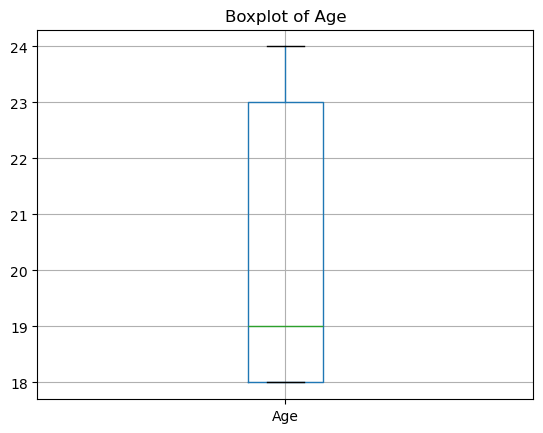

In [16]:
# boxplot for Age
df.boxplot(column='Age')  
plt.title("Boxplot of Age")
plt.show()

In [17]:
#better look at the statisics
df.describe()


,Timestamp,Age
count,101,100.00000
mean,2020-07-09 20:20:16.198019840,20.53000
min,2020-07-08 12:02:00,18.00000
25%,2020-07-08 13:29:00,18.00000
50%,2020-07-08 15:27:00,19.00000
75%,2020-07-09 11:57:00,23.00000
max,2020-07-18 20:16:21,24.00000
std,NaN,2.49628


Our data is skewed to the right as seen from both the box and whisker diagram and the statistics. I am therefore going to impute the null value with the median.

In [19]:
# Find median of Age column
median_age = df['Age'].median()
print("Median of Age:", median_age)

# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(median_age)


Median of Age: 19.0


In [20]:
# check again
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [21]:
## check for duplicates

duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Timestamp, Choose your gender, Age, What is your course?, Your current year of Study, What is your CGPA?, Marital status, Do you have Depression?, Do you have Anxiety?, Do you have Panic attack?, Did you seek any specialist for a treatment?]
Index: []


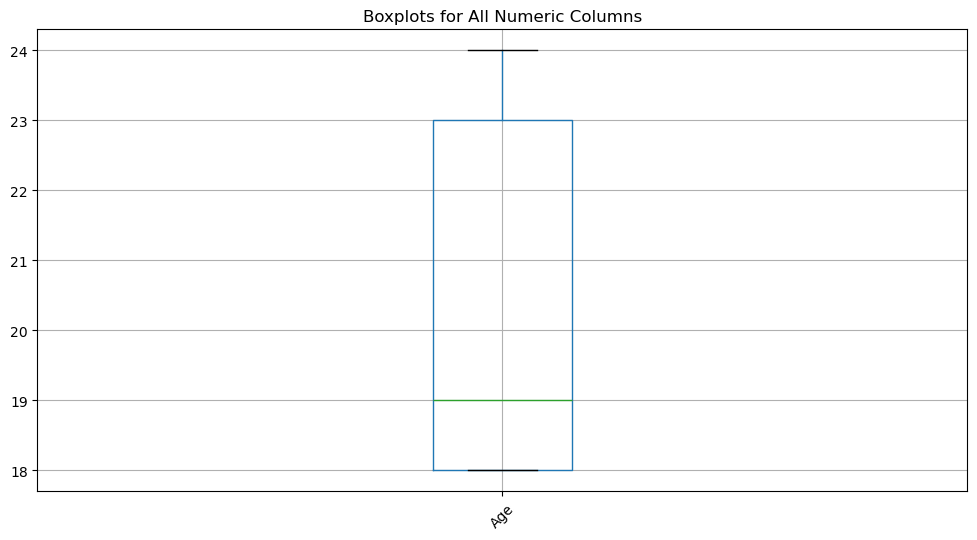

In [22]:
##checking for outlliers. going to do box and whisker diagrams

# Boxplots for all numeric columns
df.boxplot(figsize=(12, 6))
plt.title("Boxplots for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()



In [23]:
## cgpa is not in the plot but it is supposed to be numerical
## check data type

print(df['What is your CGPA?'].dtype)


object


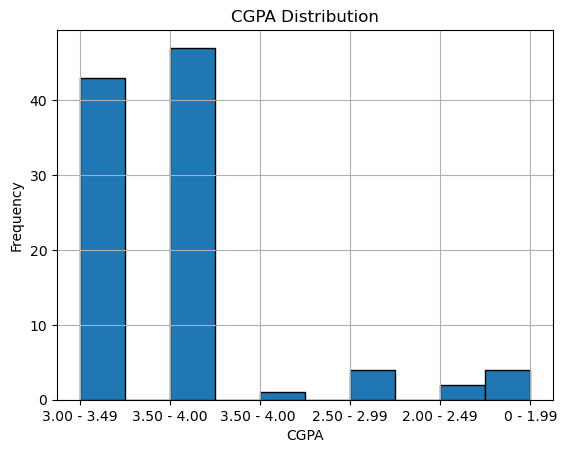

In [24]:
## cgpa column is a range, so I am going to use a histogram to check for outliers
df['What is your CGPA?'].hist( edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


No outliers, however the data is skewed to the left. A CGPA of above 3 is however very good. Most of these students are performing well


In [26]:
## check the unique values of CGPA to make sure all are represented

df['What is your CGPA?'].unique()


array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

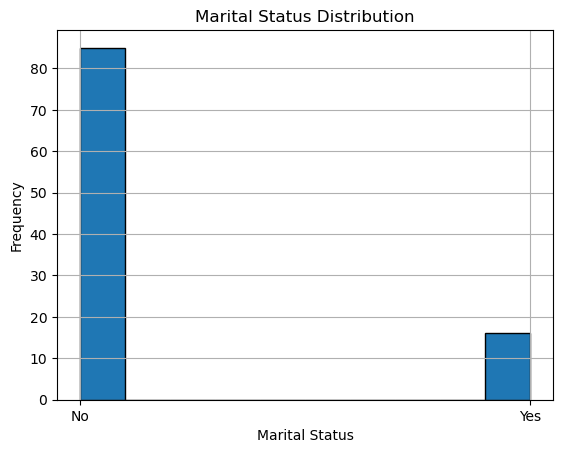

In [27]:
### Check marital status

df['Marital status'].hist( edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()


over 80% of these students are not married

Other columns we had were: 
Do you have Depression?                         
Do you have Anxiety?                            
Do you have Panic attack?                       
Did you seek any specialist for a treatment?   

so next we are going to explore how many of these students answered yes to these questions

In [30]:
print("depression Count:",df['Do you have Depression?'].value_counts()['Yes'])
print("Anxiety Count:",df['Do you have Anxiety?'].value_counts()['Yes'])
print("Panic attack Count:",df['Do you have Panic attack?'].value_counts()['Yes'])
print("sought treatment Count:",df['Did you seek any specialist for a treatment?'].value_counts()['Yes'])

depression Count: 35
Anxiety Count: 34
Panic attack Count: 33
sought treatment Count: 6


In [38]:
### there are some non numeric values in dataset. this was to try and 

# Make a copy to avoid touching the original
df_mapped = df.copy()

# Gender
df_mapped['Choose your gender'] = df_mapped['Choose your gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
})

# Course – treat each course as a number
df_mapped['What is your course?'] = df_mapped['What is your course?'].astype('category').cat.codes

# Year of Study – if it’s in words, map it
year_map = {
    'year 1': 1,
    'year 2': 2,
    'year 3': 3,
    'year 4': 4
    
}
df_mapped['Your current year of Study'] = df_mapped['Your current year of Study'].map(year_map)

# Marital status
df_mapped['Marital status'] = df_mapped['Marital status'].map({
    'No': 0,
    'Yes': 1,
})

# Mental Health Columns (Yes/No)
yes_no_map = {'Yes': 1, 'No': 0}
for col in [
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?'
]:
    df_mapped[col] = df_mapped[col].map(yes_no_map)
    
df_mapped['What is your CGPA?'] = df_mapped['What is your CGPA?'].str.strip()

# Define mapping from ranges to midpoint values
cgpa_map = {
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}

df_mapped['What is your CGPA?'] = df_mapped['What is your CGPA?'].map(cgpa_map)

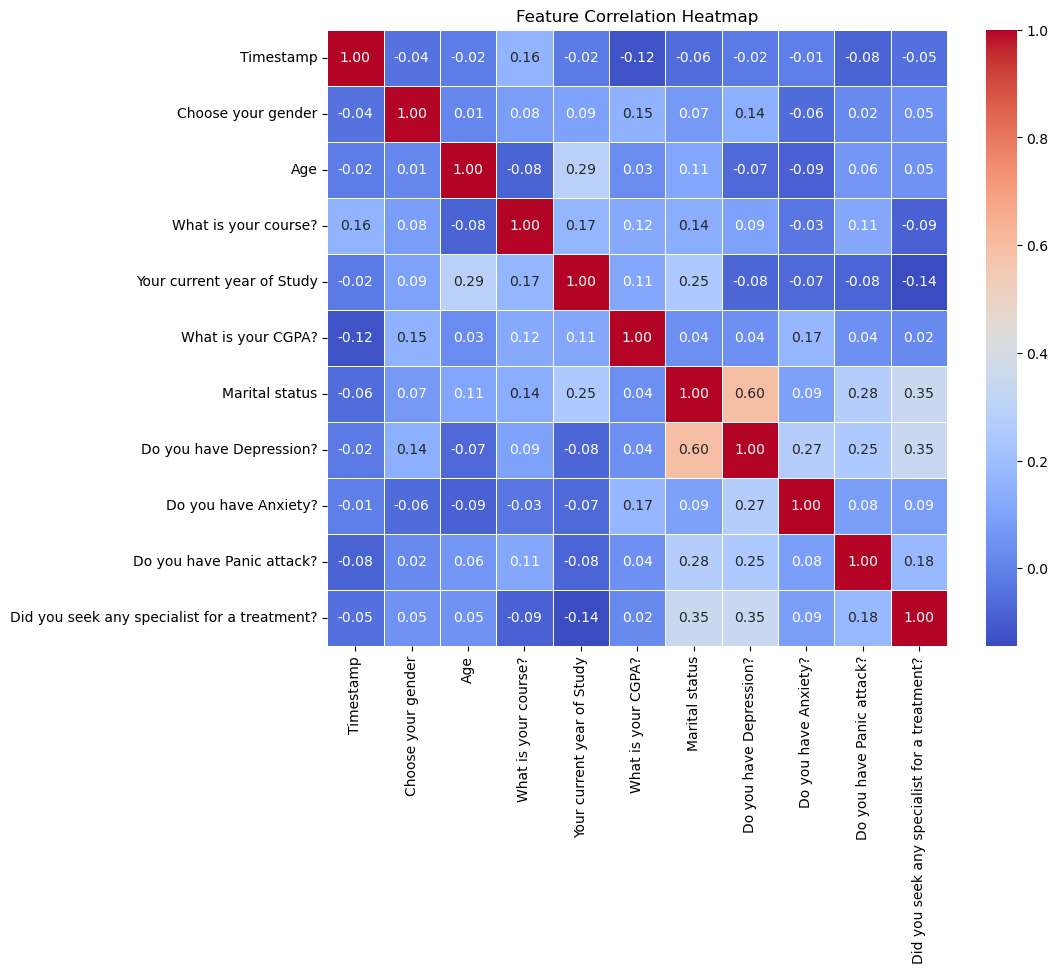

In [40]:

# Generate the correlation matrix
correlation_matrix = df_mapped.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: adjust size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Phase 3: Model Development

### At risk evaluation

In [54]:
# Convert text to binary (1 = Yes, 0 = No)
df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
df['Sought_Treatment'] = df['Did you seek any specialist for a treatment?'].map({'Yes': 1, 'No': 0})

# Define risk label: has mental health condition(s) but did not seek help
df['Risk_Label'] = (
    ((df['Depression'] == 1) | (df['Anxiety'] == 1) | (df['Panic'] == 1)) &
    (df['Sought_Treatment'] == 0)
).astype(int)

# Check the distribution
df['Risk_Label'].value_counts()


Risk_Label
1    58
0    43
Name: count, dtype: int64

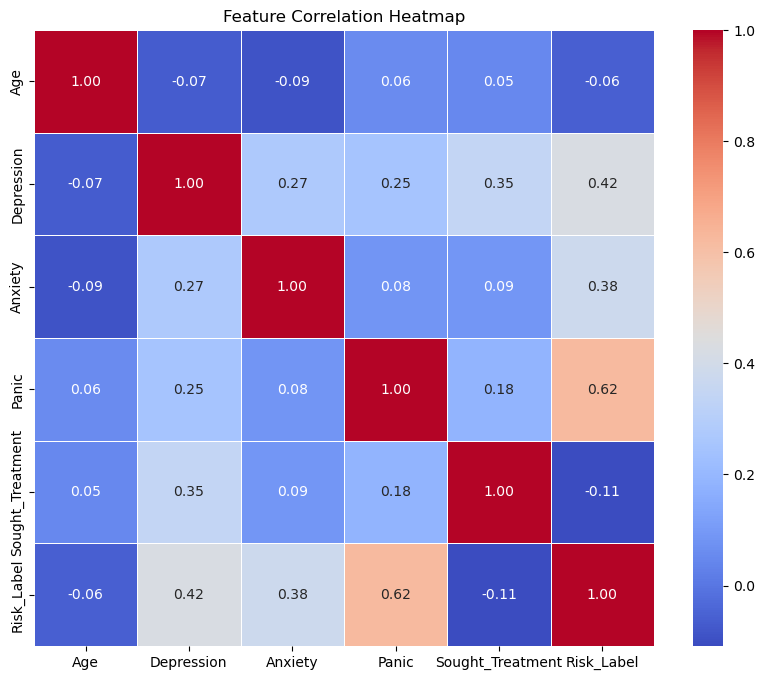

In [44]:
### Heatmap

# Calculate correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


As we can see from the heatmap, our newly created Risk Label feature or outcome moderately correlates with the features we used to engineer it from: Depression, Anxiety and Panic. This shows us that the 4 features indeed have a linear relationship, but not a perfect one. Will leave the rest to the clinicians

In [56]:
# Step 1: Prepare dataset (after Risk_Label creation)
features = ['Depression', 'Anxiety', 'Panic', 'Sought_Treatment']
X = df[features]
y = df['Risk_Label']

# Step 2: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Prediction & Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔍 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

📊 Confusion Matrix:
[[10  0]
 [ 0 11]]


Got a 100% accuracy on the model, showing it might not have been the  correct model trying Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Step 2: Predict
y_pred_log = log_model.predict(X_test)

# Step 3: Evaluate
print("🔍 Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_log))

print("📊 Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


🔍 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       0.00      0.00      0.00         3

    accuracy                           0.86        21
   macro avg       0.43      0.50      0.46        21
weighted avg       0.73      0.86      0.79        21

📊 Logistic Regression - Confusion Matrix:
[[18  0]
 [ 3  0]]


C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Phase 4: Web app deployment using flask

In [58]:
import pickle


with open('my_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'my_model.pkl'")


Model saved as 'my_model.pkl'
